<a href="https://colab.research.google.com/github/Hsynyvz/Machine-Deep-learning/blob/main/Extract_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extract Features, Visualize Filters and Feature Maps in VGG16 and VGG19 CNN Models**








**Extract Features with VGG16**

In [ ]:
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.preprocessing import image


from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.applications.vgg16 import decode_predictions

from tensorflow.keras.models import Model 


In [ ]:
model = VGG16(weights = "imagenet", include_top = False)
model.summary()

In [ ]:
model = VGG16(weights = "imagenet", include_top = False)
image_path = "/content/drive/MyDrive/Machine_Learning /feature_atraction_using_pretrain_models/2.jpeg"
img = image.load_img(image_path, target_size = (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
features = model.predict(x)

In [ ]:
x.shape

(1, 224, 224, 3)

In [ ]:
features.shape

(1, 7, 7, 512)

**Extract Features from an Arbitrary Intermediate Layer with VGG16**

In [ ]:
base_model =VGG16(weights="imagenet")

553476096/553467096 [==============================] - 4s 0us/step


In [ ]:
base_model.summary()

In [ ]:
model  = Model(inputs = base_model.input , outputs = base_model.get_layer("block4_pool").output)

In [ ]:
block4_pool_features = model.predict(x)

In [ ]:
block4_pool_features

In [ ]:
block4_pool_features.shape

(1, 14, 14, 512)

**Extract features with VGG19**

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image


from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np
from tensorflow.keras.applications.vgg19 import decode_predictions

from tensorflow.keras.models import Model 
from matplotlib import pyplot

In [ ]:
model2 = VGG19(weights = "imagenet", include_top = False)
model2.summary()

In [ ]:
image_path = "/content/drive/MyDrive/Machine_Learning /feature_atraction_using_pretrain_models/2.jpeg"
img = image.load_img(image_path, target_size = (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
features = model2.predict(x)

In [ ]:
features.shape

(1, 7, 7, 512)

**Visualize First 6 Filters Out of 64 Filters in Second Layer of VGG16 Model**

In [ ]:
model = VGG16()

In [ ]:
filters , biases = model.layers[1].get_weights()

In [ ]:
biases.shape

(64,)

In [ ]:
f_min, f_max = filters.max(), filters.min()

In [ ]:
filters.shape

(3, 3, 3, 64)

In [ ]:
n_filters ,ix = 6, 1

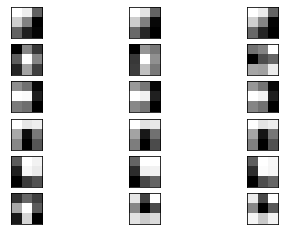

In [ ]:
n_filters ,ix = 6, 1
for i in range(n_filters):
  f = filters[:,:,:,i]
  for j in range(3):
    ax = pyplot.subplot(n_filters, 3 ,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    pyplot.imshow(f[:,:,j ], cmap= "gray")
    ix += 1

pyplot.show()

**Visualizing the Feature Map for the First Convolutional Layer in the VGG16 Model for an Input Image**

In [ ]:
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.preprocessing import image


from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.applications.vgg16 import decode_predictions

from tensorflow.keras.models import Model 

In [ ]:
model = VGG16()

model = Model(inputs = model.inputs, outputs =model.layers[1].output)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [ ]:
image_path = "/content/drive/MyDrive/Machine_Learning /feature_atraction_using_pretrain_models/2.jpeg"
img = image.load_img(image_path, target_size = (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
feature_map = model.predict(x)

In [ ]:
feature_map.shape

(1, 224, 224, 64)

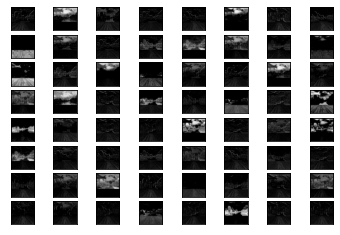

In [ ]:
square = 8
ix = 1

for _ in range(square):
  for _ in range(square):
    ax = pyplot.subplot(square, square ,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    pyplot.imshow(feature_map[0,:,:, ix- 1], cmap= "gray")
    ix += 1
pyplot.show()